In [2]:
suppressPackageStartupMessages(library(readxl))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(pheatmap))
suppressPackageStartupMessages(library(stringr))
library(hise)
library(plyr)
library(purrr)
library(vegan)
#library(arrow)
library(rstatix)
library(parallel)
library(ggpubr)
library(ComplexHeatmap)
library(compositions)
library(ggsci)
library(math)
library(NatParksPalettes)
library(readr)
libray(ggvenn)
library(ggVennDiagram)


ERROR: Error in library(compositions): there is no package called ‘compositions’


In [4]:
master <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/Figure_Notebooks/Intermediate_files/master_combined_DEG_list_all_celltypes_forfigs.csv")
head(master)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,celltype,Direction,Year,type
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,NOC2L,0.4682601,-0.33564453,0.8327112,-0.40307434,0.6868935,0.9998266,Activated memory B cell,BR1,Y1,DEGs_Male
2,ISG15,0.7716756,0.03101969,0.5329482,0.05820395,0.9535862,0.9998266,Activated memory B cell,BR2,Y1,DEGs_Male
3,SDF4,0.5631814,0.01246954,0.6510630,0.01915259,0.9847194,0.9998266,Activated memory B cell,BR2,Y1,DEGs_Male
4,B3GALT6,0.3151741,0.61845489,0.8779896,0.70439886,0.4811844,0.9998266,Activated memory B cell,BR2,Y1,DEGs_Male
5,UBE2J2,0.4517144,0.17761642,0.6528145,0.27207793,0.7855621,0.9998266,Activated memory B cell,BR2,Y1,DEGs_Male
6,INTS11,0.3656259,0.07206422,0.6856389,0.10510521,0.9162923,0.9998266,Activated memory B cell,BR2,Y1,DEGs_Male


# Venn Diagram for selected celltypes split by BR1 and BR2

## BR1

In [5]:
# List of cell types you want to subset
selected_celltypes <- c("Core CD14 monocyte", "ISG+ CD14 monocyte", 'IL1B+ CD14 monocyte', 'Intermediate monocyte', 'Core CD16 monocyte', 'ISG+ CD16 monocyte', 'C1Q+ CD16 monocyte')


# Subset the dataframe for selected cell types
subset_df <- master %>%
  filter(celltype %in% selected_celltypes, , master$padj <= 0.1, master$Direction == "BR1", master$type == "DEGs_Female") %>%
  mutate(
    celltype = factor(celltype, levels = selected_celltypes)
  )

head(subset_df)


,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,celltype,Direction,Year,type
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>
1,PAK1IP1,258.6758,-0.1956412,0.04416625,-4.429655,9.438404e-06,0.01507595,Core CD14 monocyte,BR1,Y1,DEGs_Female
2,SCAMP2,844.7677,-0.1438431,0.03258861,-4.413907,1.015216e-05,0.01507595,Core CD14 monocyte,BR1,Y1,DEGs_Female
3,RAD23A,1155.5272,-0.1334182,0.03126920,-4.266762,1.983302e-05,0.02356162,Core CD14 monocyte,BR1,Y1,DEGs_Female
4,TNFAIP8L2,877.0510,-0.1627051,0.04018377,-4.049025,5.143138e-05,0.02943396,Core CD14 monocyte,BR1,Y1,DEGs_Female
5,DDX21,2013.0686,-0.1778843,0.04376906,-4.064157,4.820630e-05,0.02943396,Core CD14 monocyte,BR1,Y1,DEGs_Female
6,HSPD1,1284.2478,-0.1820444,0.04790736,-3.799925,1.447396e-04,0.03907194,Core CD14 monocyte,BR1,Y1,DEGs_Female


In [5]:
# Split the data into two sets: DEGs_Male and DEGs_Female
degs_core_cd14 <- subset_df[subset_df$celltype == "Core CD14 monocyte", "X"]
degs_ISG_cd14 <- subset_df[subset_df$celltype == "ISG+ CD14 monocyte", "X"]
degs_IL1B_cd14 <- subset_df[subset_df$celltype == "IL1B+ CD14 monocyte", "X"]
degs_core_cd16 <- subset_df[subset_df$celltype == "Core CD16 monocyte", "X"]
degs_ISG_cd16 <- subset_df[subset_df$celltype == "ISG+ CD16 monocyte", "X"]
degs_CIQ_cd16 <- subset_df[subset_df$celltype == "C1Q+ CD16 monocyte", "X"]
degs_int_mono <- subset_df[subset_df$celltype == "Intermediate monocyte", "X"]

# Combine the two sets into one list variable 'a'
a <- list(degs_core_cd14 = degs_core_cd14, degs_ISG_cd14 = degs_ISG_cd14,degs_IL1B_cd14= degs_IL1B_cd14, degs_core_cd16=degs_core_cd16,  degs_ISG_cd16=degs_ISG_cd16, degs_CIQ_cd16=degs_CIQ_cd16, degs_int_mono=degs_int_mono )
a

$degs_core_cd14
 [1] "PAK1IP1"   "SCAMP2"    "RAD23A"    "TNFAIP8L2" "DDX21"     "HSPD1"    
 [7] "DNPH1"     "ZNF22"     "SHTN1"     "MRPS35"    "DDX24"     "UTP18"    
[13] "EXOSC5"    "NCOA7"     "UQCC2"     "OSGEP"     "PA2G4"     "GNPTG"    
[19] "VBP1"      "ASNSD1"    "MRPS18B"   "FNIP2"     "CCT2"      "MAFB"     
[25] "TRIM27"    "CCT4"      "OLA1"      "WRNIP1"    "DDX39A"    "APEX1"    
[31] "GPBAR1"    "ITGB2"     "LEPROTL1"  "EXOSC4"    "CFAP298"   "CEBPZ"    
[37] "DCXR"      "UTP11"    

$degs_ISG_cd14
[1] "MAFB"    "EVA1B"   "SPATS2L" "SLC31A2"

$degs_IL1B_cd14
[1] "FKBP5"  "UBE2D1" "RBP7"  

$degs_core_cd16
character(0)

$degs_ISG_cd16
[1] "AC007952.4" "SPATS2L"   

$degs_CIQ_cd16
character(0)

$degs_int_mono
[1] "ST13"  "CREG1"

In [66]:
# Filter data for IL1B+ CD14 monocytes
degs_IL1B_cd14 <- subset_df[subset_df$celltype == "IL1B+ CD14 monocyte", "X"]

# Filter data for all non-IL1B+ CD14 monocytes
degs_other_mono <- subset_df[subset_df$celltype != "IL1B+ CD14 monocyte", "X"]

# Remove duplicates from degs_IL1B_cd14
degs_IL1B_cd14 <- unique(degs_IL1B_cd14)

# Remove duplicates from degs_other_cd14
degs_other_mono <- unique(degs_other_mono)


# Combine the two sets into one list variable 'a'
a <- list(`IL1B+ CD14 monocyte` = degs_IL1B_cd14, `Other monocyte subsets` = degs_other_mono)


In [67]:
a

$`IL1B+ CD14 monocyte`
[1] "FKBP5"  "UBE2D1" "RBP7"  

$`Other monocyte subsets`
 [1] "PAK1IP1"    "SCAMP2"     "RAD23A"     "TNFAIP8L2"  "DDX21"     
 [6] "HSPD1"      "DNPH1"      "ZNF22"      "SHTN1"      "MRPS35"    
[11] "DDX24"      "UTP18"      "EXOSC5"     "NCOA7"      "UQCC2"     
[16] "OSGEP"      "PA2G4"      "GNPTG"      "VBP1"       "ASNSD1"    
[21] "MRPS18B"    "FNIP2"      "CCT2"       "MAFB"       "TRIM27"    
[26] "CCT4"       "OLA1"       "WRNIP1"     "DDX39A"     "APEX1"     
[31] "GPBAR1"     "ITGB2"      "LEPROTL1"   "EXOSC4"     "CFAP298"   
[36] "CEBPZ"      "DCXR"       "UTP11"      "ST13"       "CREG1"     
[41] "EVA1B"      "SPATS2L"    "SLC31A2"    "AC007952.4"

In [35]:
library(VennDiagram)

options(repr.plot.width = 10, repr.plot.height = 10)

# Generate plot
v <- venn.diagram(
  list(IL1B_CD14_monocyte = degs_IL1B_cd14,
       Other_monocyte_subsets = degs_other_mono),
  fill = c("orange", "blue"),
  cat.cex = 2, 
  cex = 2,
  cat.default.pos = "outer",
  cat.pos = c(-10, 10, 60),
  cat.dist = rep(0.1, 3), # Increase the distance between labels and the diagram
  cat.fontfamily = "sans",
  filename = NULL
)

# plot  
grid.newpage()
grid.draw(v)


ERROR: Error in VennDiagram::draw.pairwise.venn(area1 = length(x[[1]]), area2 = length(x[[2]]), : Unexpected parameter length for "cat.pos"


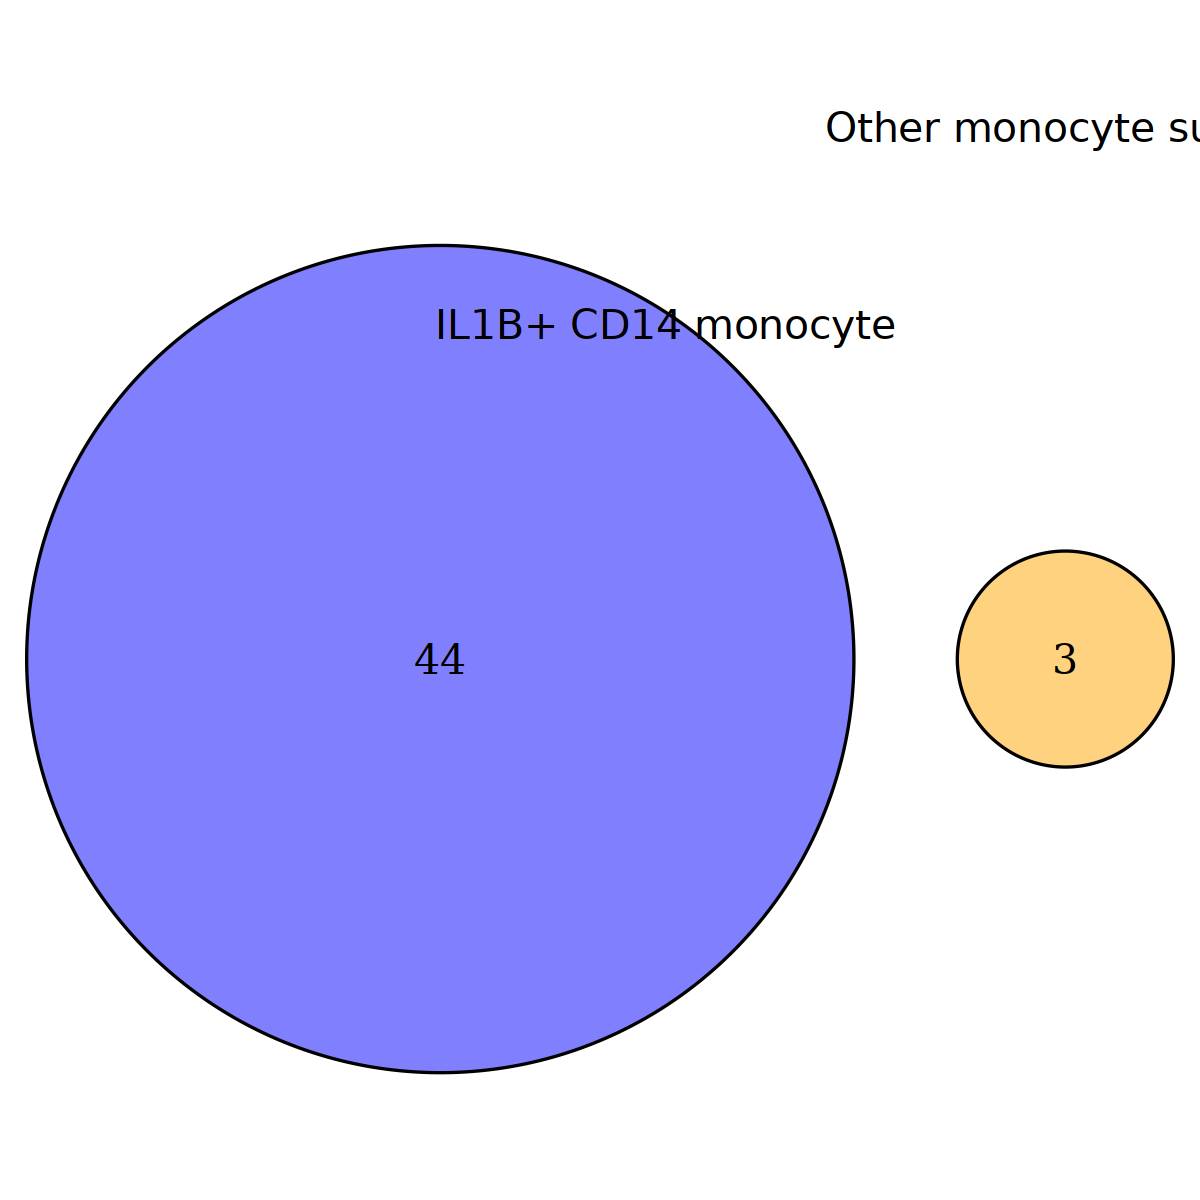

In [43]:
library(VennDiagram)

options(repr.plot.width = 10, repr.plot.height = 10)

# Define custom labels
#labels <- c("IL1B+ CD14 monocyte", "Other monocyte subsets")

# Generate plot
v <- venn.diagram(
  x = list(IL1B_CD14_monocyte = degs_IL1B_cd14,
           Other_monocyte_subsets = degs_other_mono),
  category.names = labels,
  fill = c("orange", "blue"),
  cat.cex = 2,
  cex = 2,
  cat.default.pos = "outer",
  cat.dist = rep(0.2, 1), # Increase the distance between labels and the diagram
  cat.fontfamily = "sans",
  filename = NULL
)

# plot  
grid.newpage()
grid.draw(v)


In [111]:
library(eulerr)

# Create the plot object
p1 <- euler(a, shape = "ellipse")
# Set margin
par(mar=c(5,10,5,5))
# Specify colors and font size
png('/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/Figure_Notebooks/Intermediate_files/venn_test1.png', width=800, height=600)  # Adjust width and height as needed
plot(p1, quantities = list(type = c("counts"), font=2, round=2, cex=1),
     labels = list(cex=1.5, fontsize =12),
     fill = c("skyblue", "orange"))
dev.off()


png 
  2

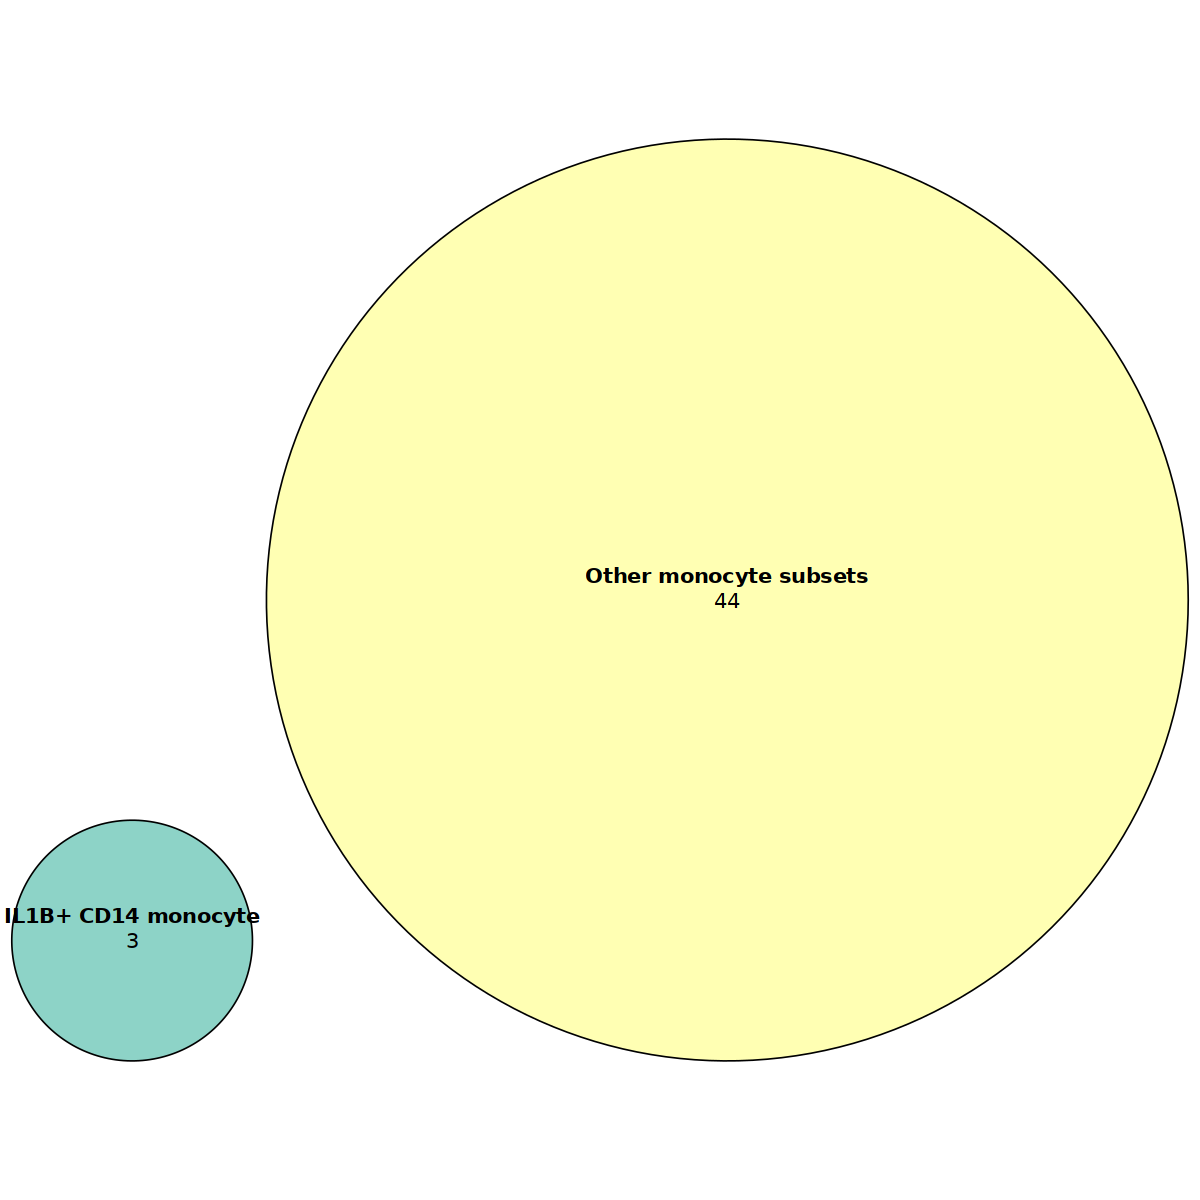

In [120]:
library(eulerr)

# Create the plot object
p1 <- euler(a, shape = "ellipse")

# Set margin
# par(mar=c(7,20,5,20))  # Adjust margins (bottom, left, top, right)

# Specify colors and font size
plot(p1, quantities = list(fontface = 5),
    fill = RColorBrewer::brewer.pal(4, "Set3"),
    border = "transparent",
    auto.key = list(space = "right"))

# # Save the plot as PNG
# png('/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/Figure_Notebooks/Intermediate_files/venn_test1.png', width=800, height=600)  # Adjust width and height as needed
# plot(p1, quantities = list(type = c("counts"), font=2, round=2, cex=1),
#      font = 1:6,
#      labels = list(cex=1.5, fontsize =12),
#      fill = c("skyblue", "orange"))
# dev.off()  # Close the PNG device


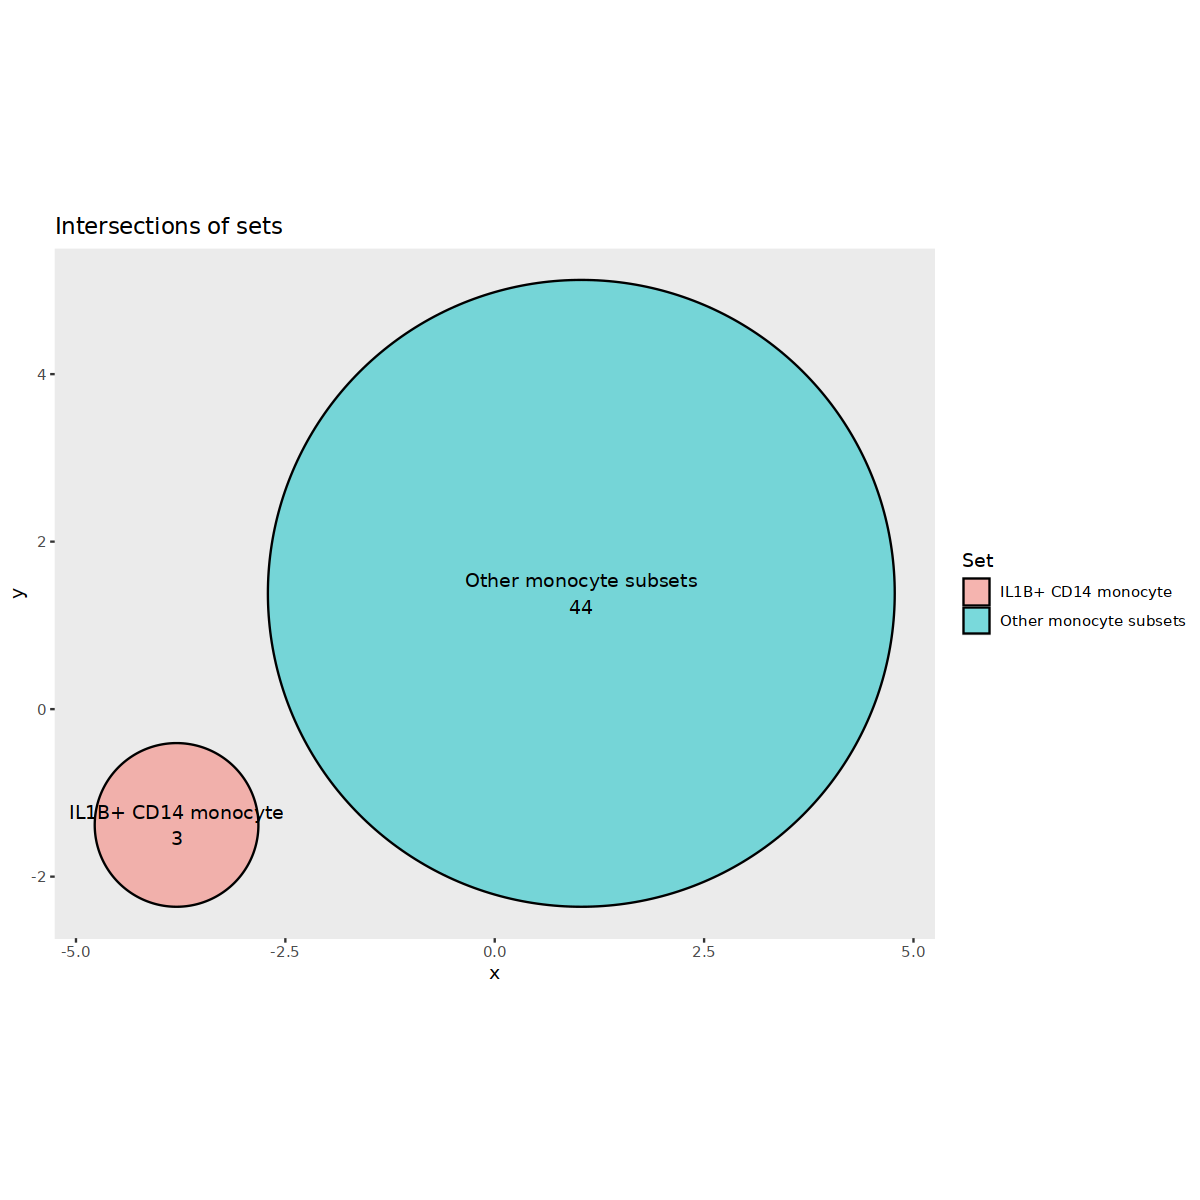

In [95]:
ggeulerr <- function(combinations, show_quantities = TRUE, show_labels = TRUE, ...) {
  data <-
    eulerr::euler(combinations = combinations) %>%
    plot(quantities = show_quantities) %>%
    pluck("data")
  
  tibble() %>%
    ggplot() +
    ggforce::geom_ellipse(
      data = data$ellipses %>% as_tibble(rownames = "Set"),
      mapping = aes(x0 = h, y0 = k, a = a, b = b, angle = 0, fill = Set),
      alpha = 0.5
    ) +
    geom_text(
      data = {
        data$centers %>%
          mutate(
            label = labels %>% map2(quantities, ~ {
              if (!is.na(.x) && !is.na(.y) && show_labels) {
                paste0(.x, "\n", sprintf(.y, fmt = "%.2g"))
              } else if (!is.na(.x) && show_labels) {
                .x
              } else if (!is.na(.y)) {
                .y
              } else {
                ""
              }
            })
          )
      },
      mapping = aes(x = x, y = y, label = label)
    ) +
    theme(panel.grid = element_blank()) +
    coord_fixed() +
    scale_fill_hue()
}

#
# Example
#

a %>%
  ggeulerr() +
  labs(title = "Intersections of sets")

In [54]:
library(ggforce)

In [53]:
install.packages("ggforce")

also installing the dependency ‘tweenr’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



## BR2

In [121]:
# List of cell types you want to subset
selected_celltypes <- c("Core CD14 monocyte", "ISG+ CD14 monocyte", 'IL1B+ CD14 monocyte', 'Intermediate monocyte', 'Core CD16 monocyte', 'ISG+ CD16 monocyte', 'C1Q+ CD16 monocyte')


# Subset the dataframe for selected cell types
subset_df <- master %>%
  filter(celltype %in% selected_celltypes, , master$padj <= 0.1, master$Direction == "BR2", master$type == "DEGs_Female") %>%
  mutate(
    celltype = factor(celltype, levels = selected_celltypes)
  )

head(subset_df)


,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,celltype,Direction,Year,type
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>
1,SIDT2,26.61786,0.5388961,0.12194329,4.419235,9.905076e-06,0.06805778,C1Q+ CD16 monocyte,BR2,Y1,DEGs_Female
2,SFXN3,255.56418,0.2599405,0.05466410,4.755232,1.982186e-06,0.01177419,Core CD14 monocyte,BR2,Y1,DEGs_Female
3,CD300E,2040.11562,0.3123234,0.06949884,4.493937,6.991844e-06,0.01507595,Core CD14 monocyte,BR2,Y1,DEGs_Female
4,SFT2D2,759.83215,0.1483783,0.03627177,4.090736,4.300061e-05,0.02943396,Core CD14 monocyte,BR2,Y1,DEGs_Female
5,AC012368.1,201.25229,0.3581148,0.08803574,4.067834,4.745210e-05,0.02943396,Core CD14 monocyte,BR2,Y1,DEGs_Female
6,RAP2B,1722.06061,0.1994039,0.04775850,4.175254,2.976539e-05,0.02943396,Core CD14 monocyte,BR2,Y1,DEGs_Female


In [122]:
# Filter data for IL1B+ CD14 monocytes
degs_IL1B_cd14 <- subset_df[subset_df$celltype == "IL1B+ CD14 monocyte", "X"]

# Filter data for all non-IL1B+ CD14 monocytes
degs_other_mono <- subset_df[subset_df$celltype != "IL1B+ CD14 monocyte", "X"]

# Remove duplicates from degs_IL1B_cd14
degs_IL1B_cd14 <- unique(degs_IL1B_cd14)

# Remove duplicates from degs_other_cd14
degs_other_mono <- unique(degs_other_mono)


# Combine the two sets into one list variable 'a'
a <- list(`IL1B+ CD14 monocyte` = degs_IL1B_cd14, `Other monocyte subsets` = degs_other_mono)


In [123]:
a

$`IL1B+ CD14 monocyte`
 [1] "BCL2A1"   "PTGS2"    "NLRP3"    "RASGEF1B" "IL1B"     "CMTM6"   
 [7] "BCL6"     "G0S2"     "SGK1"     "METRNL"   "OAZ1"     "TNF"     
[13] "NR4A1"    "TNFRSF1B" "NAMPT"    "SELENOK"  "ID2"      "CYTIP"   
[19] "MIDN"    

$`Other monocyte subsets`
 [1] "SIDT2"      "SFXN3"      "CD300E"     "SFT2D2"     "AC012368.1"
 [6] "RAP2B"      "ORAI2"      "C18orf25"   "TNK2"       "SKI"       
[11] "MEF2D"      "GPR155"     "NBEAL2"     "DENND5A"    "SORL1"     
[16] "BAZ2A"      "LIN7A"      "LINC02001"  "SLC16A6"    "ZBTB18"    
[21] "SLC6A6"     "SESTD1"     "CHST11"     "ZSWIM8"     "UVSSA"     
[26] "HSH2D"      "MED15"      "IP6K1"      "PECAM1"     "FURIN"     
[31] "NDRG1"      "SLC12A6"    "MHENCR"     "GRAMD4"     "NHLRC3"    
[36] "FAM53B"     "FOXO1"      "CSF3R"      "TP53INP1"   "DEF8"      
[41] "CIC"        "IVNS1ABP"   "DSTYK"      "TRIM38"     "FAM214B"   
[46] "ZNF385A"    "RPS6KA5"    "KSR1"       "RETREG3"    "TRIM8"     
[51] "TLE3"       "PI4KA"      "RC3H2"      "GIT1"       "ECE1"      
[56] "FBP1"       "RP2"        "FCGR3A"     "ATP13A3"    "ANKRD13A"  
[61] "NUDT4"      "PDP1"       "PIM1"       "LRMP"       "GBP5"      
[66] "CR1"        "WARS"       "ZDHHC7"     "OGFRL1"     "ZDHHC20"

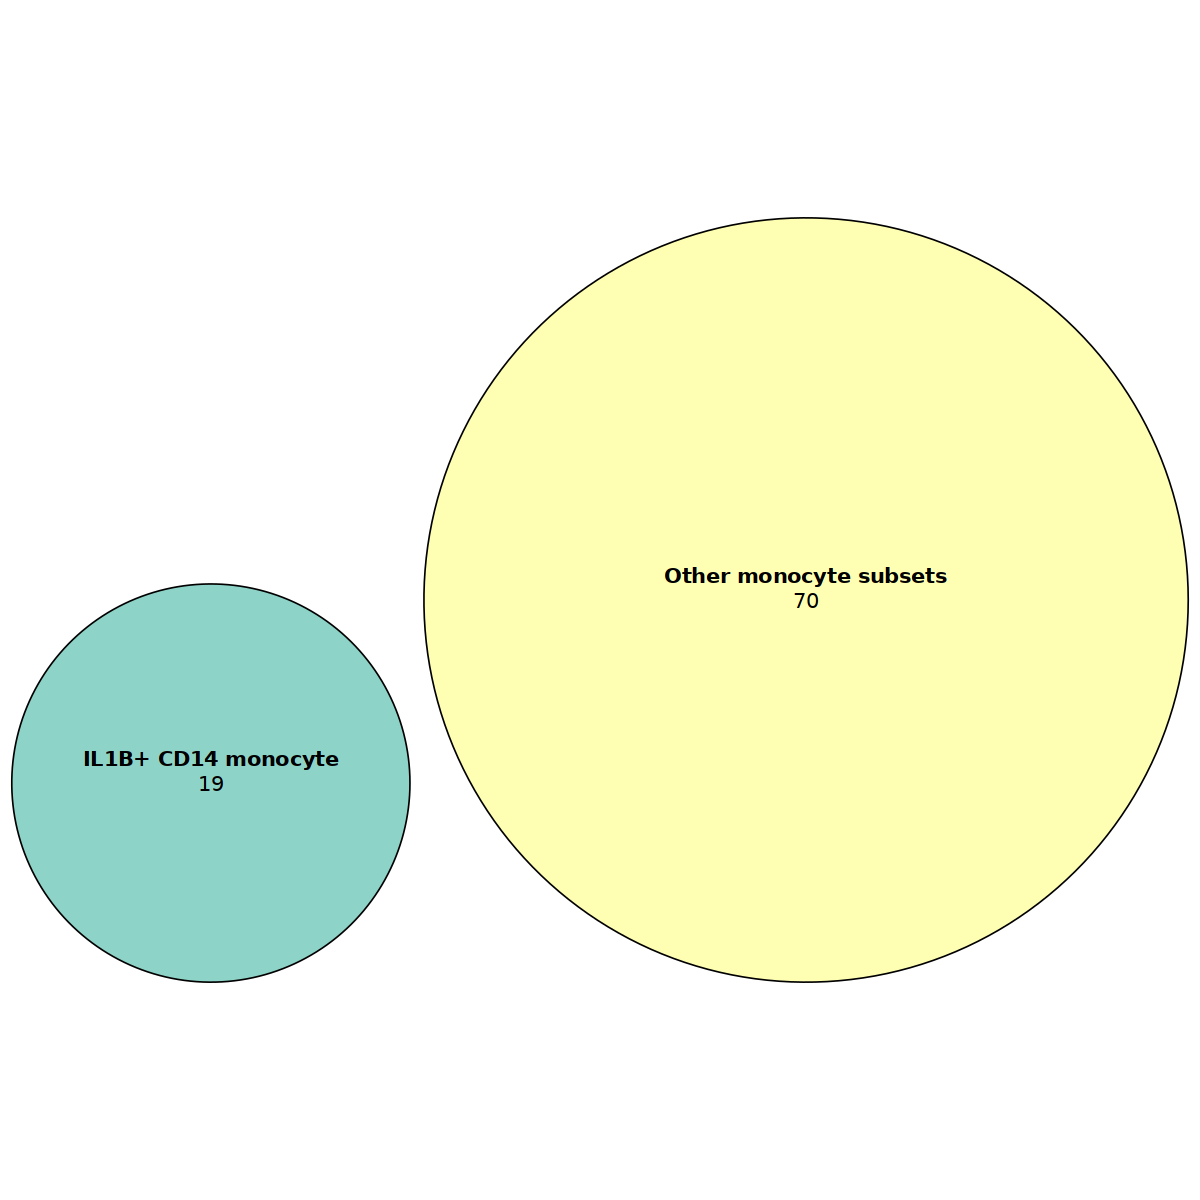

In [124]:
library(eulerr)

# Create the plot object
p1 <- euler(a, shape = "ellipse")

# Set margin
# par(mar=c(7,20,5,20))  # Adjust margins (bottom, left, top, right)

# Specify colors and font size
plot(p1, quantities = list(fontface = 5),
    fill = RColorBrewer::brewer.pal(4, "Set3"),
    border = "transparent",
    auto.key = list(space = "right"))

# # Save the plot as PNG
# png('/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/Figure_Notebooks/Intermediate_files/venn_test1.png', width=800, height=600)  # Adjust width and height as needed
# plot(p1, quantities = list(type = c("counts"), font=2, round=2, cex=1),
#      font = 1:6,
#      labels = list(cex=1.5, fontsize =12),
#      fill = c("skyblue", "orange"))
# dev.off()  # Close the PNG device
